In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import random

2022-03-10 09:25:03.731429: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-10 09:25:03.731754: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


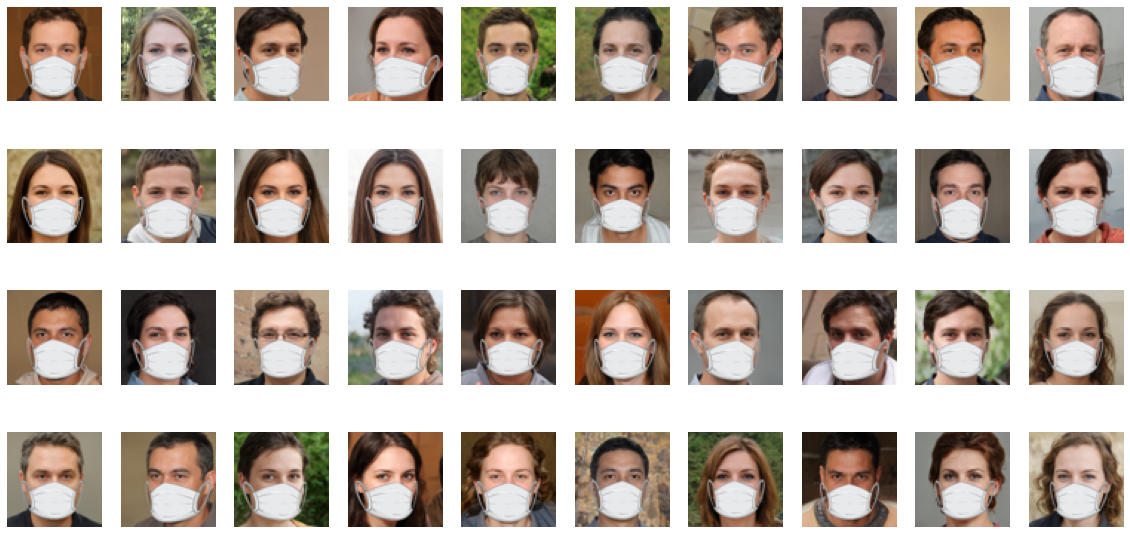

In [15]:
parameter = 2
nb_data = 5 * 2**(2*parameter-1)
image_size=(64,64)
mask = True
X_data = []
path = f'/home/christophelanson/code/christophelanson/icangetyoursmile/raw_data/{image_size[0]}x{image_size[1]}/'
for number in range(nb_data):
        rand_img_nb = random.randint(0,9999)
        if mask :
            img_path = f'{path}Mask/with-mask-default-mask-seed{str(rand_img_nb).zfill(4)}.png'
        else:
            img_path = f'{path}No_mask/seed{str(rand_img_nb).zfill(4)}.png'
        image = np.asarray(Image.open(img_path)).tolist()
        X_data.append(image)
nb_graphs = nb_data
nb_rows = int(2**parameter)
nb_cols = int(5 * 2**(parameter-1))
plt.figure(figsize=(20,10))
for graph_nb in range(nb_graphs):
    plt.subplot(nb_rows,nb_cols, graph_nb+1)
    plt.imshow(X_data[graph_nb])
    plt.axis('off')

In [ ]:
# masked images top, no mask images bottom
parameter = 2
nb_data = 5 * 2**(2*parameter-1)
image_size=(64,64)
X_data = []
path = f'/home/christophelanson/code/christophelanson/icangetyoursmile/raw_data/{image_size[0]}x{image_size[1]}/'
for number in range(nb_data):
        rand_img_nb = random.randint(0,9999)
        if mask :
            img_path = f'{path}Mask/with-mask-default-mask-seed{str(rand_img_nb).zfill(4)}.png'
        else:
            img_path = f'{path}No_mask/seed{str(rand_img_nb).zfill(4)}.png'
        image = np.asarray(Image.open(img_path)).tolist()
        X_data.append(image)
nb_graphs = nb_data
nb_rows = int(2**parameter)
nb_cols = int(5 * 2**(parameter-1))
plt.figure(figsize=(20,10))
for graph_nb in range(nb_graphs):
    plt.subplot(nb_rows,nb_cols, graph_nb+1)
    plt.imshow(X_data[graph_nb])
    plt.axis('off')

In [4]:
model_name = 'full_Unet_pwr5_64_800epochs_dataset5000'
from api.fast import download_model_from_gcp
model = download_model_from_gcp(model_name=model_name)

2022-03-10 09:25:36.361091: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-10 09:25:36.361159: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-10 09:25:36.361180: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (HP-CL): /proc/driver/nvidia/version does not exist
2022-03-10 09:25:36.362172: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
picture_name='/home/christophelanson/code/christophelanson/icangetyoursmile/public_faces/Daniel_Craig_64x64_mask.png'

In [6]:
#picture_name='/home/christophelanson/code/christophelanson/icangetyoursmile/raw_data/64x64/Mask/with-mask-default-mask-seed2000.png'

In [7]:
image = Image.open(picture_name)
image.size

(64, 64)

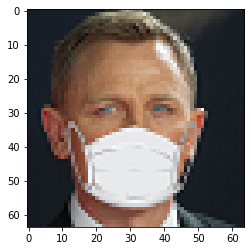

In [8]:
image = np.asarray(Image.open(picture_name))
plt.imshow(image)

In [9]:
image[:,:,0:3].shape

(64, 64, 3)

In [10]:
image2=np.expand_dims(image[:,:,0:3],0)
image2.shape

(1, 64, 64, 3)

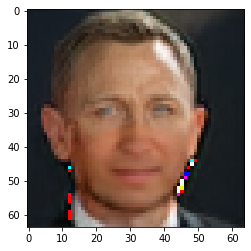

In [11]:
smile_image = model.predict(image2).astype(np.uint8)
plt.imshow(smile_image[0])

In [ ]:
# generate 5 images and print them

In [271]:
def plot_results(X_test, y_pred):
    plt.figure(figsize=(20,10))
    nb_graphs = len(X_test)
    for graph_nb in range(nb_graphs):
        plt.subplot(2,nb_graphs, graph_nb+1)
        plt.imshow(X_test[graph_nb])
        plt.subplot(2,nb_graphs, graph_nb +1 +nb_graphs)
        plt.imshow(y_pred[graph_nb])

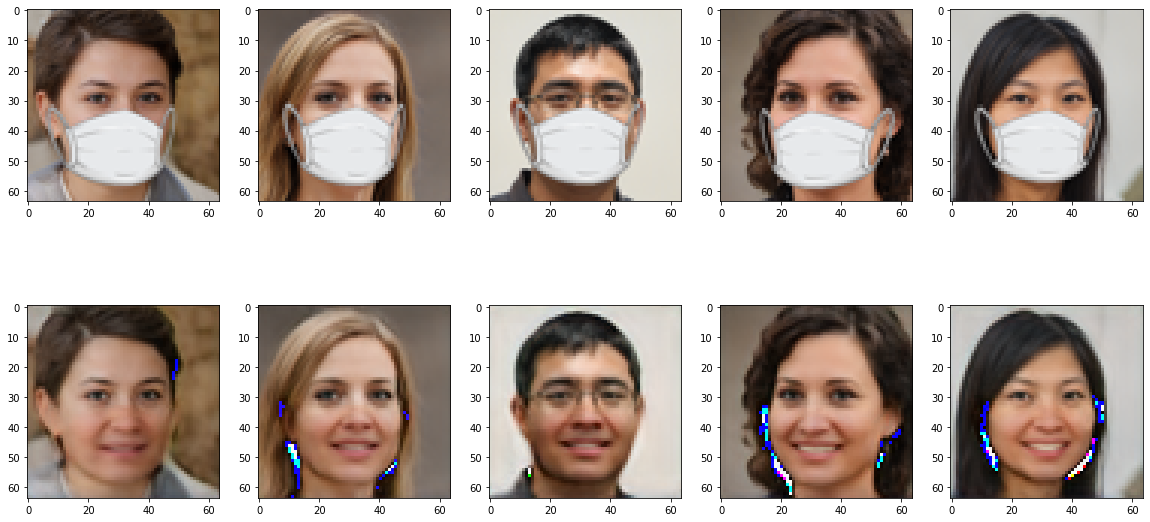

In [273]:
X_visu = []
path = f'/home/christophelanson/code/christophelanson/icangetyoursmile/raw_data/{image_size[0]}x{image_size[1]}/'
for number in range(5):
        rand_img_nb = random.randint(0,9999)
        mask_path = f'{path}Mask/with-mask-default-mask-seed{str(rand_img_nb).zfill(4)}.png'
        mask_im = np.asarray(Image.open(mask_path)).tolist()
        X_visu.append(mask_im)
y_pred = model.predict(X_visu).astype(np.uint8)
plot_results(X_visu, y_pred)